# Temporal View of Tolerance of Foreign Workers

__Research Question__: How do perceptions of Foreign workers change from 2000-2018? 

With BRI officially joining Nigeria in partnership in 2013, we hope to identify changes in tolerance between the two decades of collected data.

***

In [10]:
import pandas as pd
import geopandas as gpd
import plotly.express as px

### Variables of interest
For Group Choice: 
> Q89b Neighbours: people of different ethnicity   
> Q89e Neighbours: immigrants and foreign workers

For dependant Variable: 
> econAssistance   
> scaleInfluence   
> econInfluence   

In [20]:
groupChoice = 'q89e' 
dependantVar = 'econInfluence'

### Retrieving Data 

Data from Afrobarometer 2014/2015 and 2016/2017 is pulled to view tolerance variables

In [2]:
df = pd.read_csv(r'/Users/natalie_kraft/Documents/LAS/NIG_r6.csv')

/Users/natalie_kraft/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (34,36,210,260,305) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Transformations for Chinese Influence Variables 
<br>
Variables include: 

- economic_q81a: How much influence does China's economic activities have on the economy? 
- influence_q81b: Is Chinese influence positive or negative? 
- results_q81e: Does development assistance do a good/bad job at helping the country? 

*Note: original values saved with the question number, new variables will be representative of the value*

In [16]:
# q81a --> econInfluence

# transformation
# How much influence do you think China’s economic activities in Nigeria have on our economy, 
# or haven’t you heard enough to say?

response_codes = {0: "None",
                   1: "A little" , 
                   2: "Some",
                   3: "A lot",
                   9: "Don't know",
                   99: "invalid",
                   98: "refused",
                   -1: "missing"
                  }
df['q81a_reason'] = df['q81a'].map(response_codes)

q81a = {0: 1,
        1: 2,
        2: 3, 
        3: 4,
        }


df['econInfluence'] = df['q81a'].map(q81a)
    
df.groupby(['econInfluence', 'q81a_reason'])['respno'].count().to_frame()

,,respno
econInfluence,q81a_reason,
1.0,None,84
2.0,A little,429
3.0,Some,776
4.0,A lot,806


In [17]:
# q81b --> scaleInfluence

# transformation
# In general, do you think that China’s economic and political influence on
# Nigeria is mostly positive, or mostly negative, or haven’t you heard enough to say?

response_codes_b = {1: "very_negative",
                     2: "somewhat_negative", 
                     3: "neutral", 
                     4: "somewhat_positive", 
                     5: "very_positive", 
                     9: "na", 
                     98: "refused", 
                     -1: "missing"
                     }
    
df['q81b_reason'] = df['q81b'].map(response_codes_b)

q81b = {1: 1,
        2: 2, 
        3: 3,
        4: 4,
        5: 5,
        }

df['scaleInfluence'] = df['q81b'].map(q81b)

df.groupby(['scaleInfluence', 'q81b_reason'])['respno'].count().to_frame()

,,respno
scaleInfluence,q81b_reason,
1.0,very_negative,44
2.0,somewhat_negative,120
3.0,neutral,303
4.0,somewhat_positive,1030
5.0,very_positive,566


In [18]:
# q81e --> econAssistance

# transformation
# In your opinion, does China’s economic development assistance to 
# Nigeria do a good job or a bad job of meeting the country’s needs,
# or haven’t you heard enough to say?

response_codes_e = {1: "very_bad",
                     2: "somewhat_bad", 
                     3: "neutral", 
                     4: "somewhat_good", 
                     5: "very_good", 
                     7: "no_assistance_given",
                     9999: "na", 
                     98: "refused", 
                     -1: "missing"
                   }
    
df['q81e_reason'] = df['q81e'].map(response_codes_e)

q81e = {1: 1,
        2: 2, 
        3: 3,
        4: 4,
        5: 5
        }


df['econAssistance'] = df['q81e'].map(q81e)

df.groupby(['econAssistance', 'q81e_reason'])['respno'].count().to_frame()

,,respno
econAssistance,q81e_reason,
1.0,very_bad,77
2.0,somewhat_bad,253
3.0,neutral,309
4.0,somewhat_good,837
5.0,very_good,525


### Transformations for Tribes

In [26]:
# map language codes from q87

tribe_codes = {  17 : 'Hausa', 
                    45 : 'Yoruba',
                    621: 'Igbo', 
                    9995: 'Other', 
                    627 : 'Ibibio',
                    631 : 'Ijaw',
                    632 : 'Edo',
                    640 : 'Kalabari',
                    635 : 'Idoma',
                    630 : 'Nupe',
                    629 : 'Tiv',
                    634 : 'Urhobo',
                    625 : 'Fulani',
                    623 : 'Efik',
                    633 : 'Igala',
                    624 : 'Ebira',
                    653 : 'Tarok',
                    626 : 'Isoko',
                    643 : 'Jukun',
                    652 : 'Tangale',
                    647 : 'Eggon',
                    637 : 'Ikwere',
                    646 : 'Degema',
                    651 : 'Nwangavul',
                    655 : 'Yala',
                    648 : 'Kagoma',
                    645 : 'Alago',
                    654 : 'Waja',
                    650 : 'Mumuye',
                    18  : 'Kanuri',
                    644 : 'Gwari',
                    649 : 'Lanta',
                    9999  : 'dontknow',
                  }

df['tribe_name'] = df['q87'].map(tribe_codes)


color_codes = { 'Hausa': 'rgb(224, 62, 34)', 
                'Yoruba': 'rgb(34, 43, 224)',
                'Igbo':  'rgb(34, 224, 40)', 
                'Ebira': 'rgb(14, 99, 17)', 
                'Edo': 'rgb(211, 235, 212)',
                'Efik':  'rgb(163, 168, 8)', 
                'Fulani': 'rgb(140, 140, 121)', 
                'Tarok': 'rgb(150, 10, 12)',
                'Tiv': 'rgb(90, 80, 1)',
                'Ibibio': 'rgb(227, 178, 138)',
                'Igbo':  'rgb(222, 129, 53)',
                'Idoma': 'rgb(154, 230, 227)', 
                'Igala': 'rgb(70, 9, 97)',
                'Ijaw':  'rgb(204, 192, 209)', 
                'Kanuri': 'rgb(237, 171, 198)', 
                'Nupe': 'rgb(224, 218, 220)',
                'Other ':  'rgb(164, 101, 191)', 
                'Urhobo': 'rgb(138, 88, 107)', 
                'Eggon' : 'rgb(30, 200, 12)',
                  }

df['color_map'] = df['tribe_name'].map(color_codes)
df['color_map'] = df['color_map'].fillna('rgb(0,0,0)')

__Mapping of Tolerance Variables__

In [14]:
tolerance = {1: "strong_dislike",
                     2: "dislike", 
                     3: "neutral", 
                     4: "like", 
                     5: "strongly_like",
                     9: "idk", 
                     98: "refused", 
                     -1: "missing"
                   }  

df[groupChoice + '_reason'] = df[groupChoice].map(tolerance)


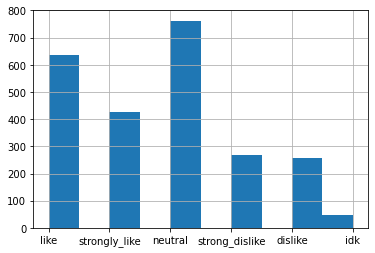

In [15]:
df.groupby( groupChoice + '_reason')['respno'].count().to_frame()
df[groupChoice + '_reason'].hist()

In [27]:
fig = px.bar(df, x=groupChoice + "_reason", y=dependantVar, color='tribe_name')
fig.show()